# 1. Kết nối tới drive , import một số thư viện cần thiết

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [3]:
CMG = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/CMG.csv")

In [4]:
CMG

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,19753,19621,19951,19026,432.09K,1.01%
1,12/4/2017,20612,20348,20744,20149,476.28K,4.35%
2,12/5/2017,21008,20612,21801,20017,923.95K,1.92%
3,12/6/2017,22065,21008,22462,20876,747.13K,5.03%
4,12/7/2017,23585,22462,23585,22462,808.92K,6.89%
...,...,...,...,...,...,...,...
1371,6/5/2023,44050,41200,44050,41200,207.10K,6.92%
1372,6/6/2023,45700,46500,46500,43950,50.20K,3.75%
1373,6/7/2023,45500,44200,46000,43600,24.40K,-0.44%
1374,6/8/2023,44500,44100,44900,43600,25.00K,-2.20%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [5]:
# Drop missing values
CMG = CMG.dropna()
# Reset the index
CMG = CMG.reset_index(drop=True)

### Chuyển dữ liệu cột Price sang dạng float

In [6]:
CMG["Price"]=CMG["Price"].astype(float)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

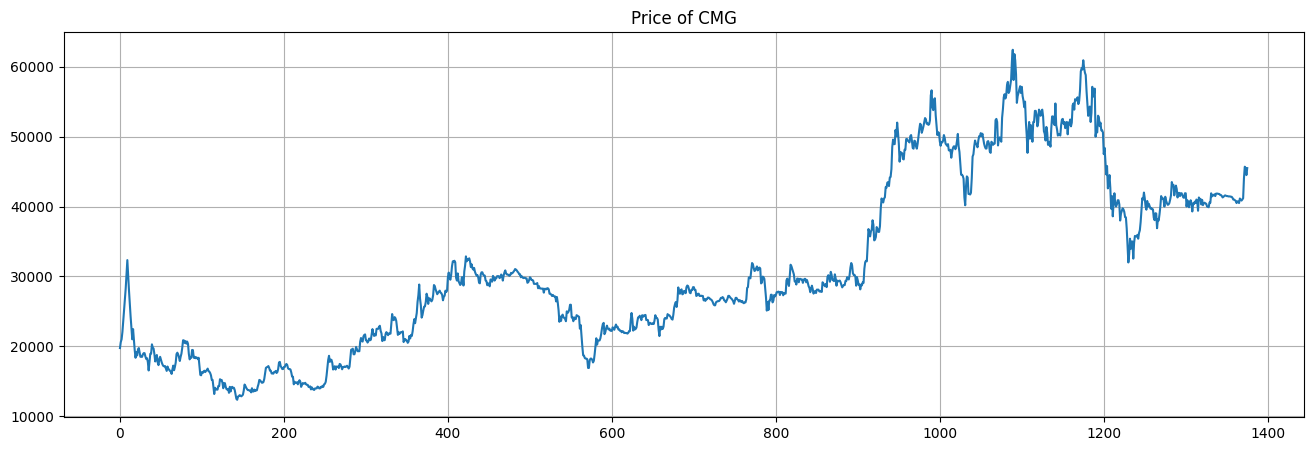

In [7]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(CMG["Price"])
plt.title('Price of CMG')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [8]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(CMG))
test_size = int(0.2 * len(CMG))
val_size = len(CMG) - train_size - test_size

In [9]:
train_data = CMG[:train_size]
test_data = CMG[train_size:train_size+test_size]
val_data = CMG[train_size+test_size:]

<h1> Quá trình training

In [10]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [11]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [12]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [13]:
#Tạo index cho 30 ngày tiếp theo
last_index =  CMG.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[41611.49766417 41630.63591725 41649.77417032 41668.91242339
 41688.05067647 41707.18892954 41726.32718262 41745.46543569
 41764.60368876 41783.74194184 41802.88019491 41822.01844798
 41841.15670106 41860.29495413 41879.43320721 41898.57146028
 41917.70971335 41936.84796643 41955.9862195  41975.12447258
 41994.26272565 42013.40097872 42032.5392318  42051.67748487
 42070.81573795 42089.95399102 42109.09224409 42128.23049717
 42147.36875024 42166.50700331]


<h1>Đánh giá độ chính xác của thuật toán

In [14]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 1488.4016837271015
Testing RMSE: 14916.184841738332


In [15]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 1108.370223285509
Testing MAE: 13911.555975675736


In [16]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 2.725163385781076
Testing MAPE: 26.991386686061052


<h1>Vẽ hình mô tả dự đoán

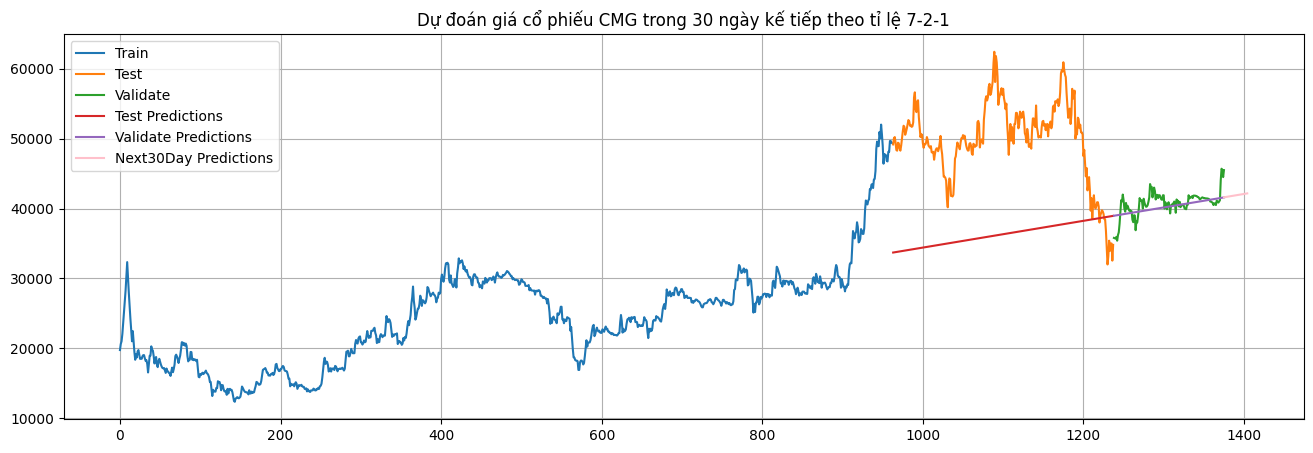

In [17]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu CMG trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [18]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(CMG))
test_size = int(0.3 * len(CMG))
val_size = len(CMG) - train_size - test_size

In [19]:
train_data = CMG[:train_size]
test_data = CMG[train_size:train_size+test_size]
val_data = CMG[train_size+test_size:]

<h1>Quá trình training

In [20]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [21]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [22]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [23]:
#Tạo index cho 30 ngày tiếp theo
last_index =  CMG.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[37826.49022528 37842.05677933 37857.62333338 37873.18988743
 37888.75644148 37904.32299553 37919.88954958 37935.45610363
 37951.02265768 37966.58921173 37982.15576578 37997.72231983
 38013.28887388 38028.85542793 38044.42198198 38059.98853603
 38075.55509008 38091.12164413 38106.68819818 38122.25475223
 38137.82130628 38153.38786033 38168.95441438 38184.52096843
 38200.08752248 38215.65407653 38231.22063058 38246.78718463
 38262.35373868 38277.92029273]


<h1>Đánh giá độ chính xác của thuật toán

In [24]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 4229.8548112466815
Testing RMSE: 15015.532111234437


In [25]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 3973.0642426597833
Testing MAE: 12698.945987892452


In [26]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 9.632178087684865
Testing MAPE: 25.399947692371754


<h1>Vẽ hình mô tả dự đoán

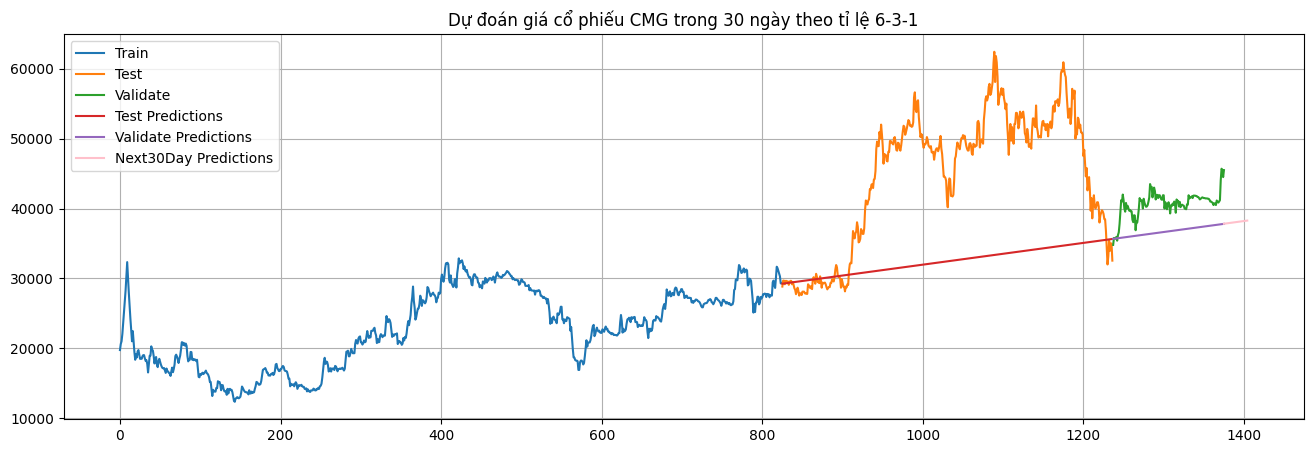

In [27]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Dự đoán giá cổ phiếu CMG trong 30 ngày theo tỉ lệ 6-3-1")
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color="pink")
plt.legend(['Train', 'Test','Validate', 'Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [28]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(CMG))
test_size = int(0.3 * len(CMG))
val_size = len(CMG) - train_size - test_size

In [29]:
train_data = CMG[:train_size]
test_data = CMG[train_size:train_size+test_size]
val_data = CMG[train_size+test_size:]

<h1> Quá trình training

In [30]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [31]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [32]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [33]:
#Tạo index cho 30 ngày tiếp theo
last_index =  CMG.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[38645.70319003 38661.9962679  38678.28934577 38694.58242364
 38710.8755015  38727.16857937 38743.46165724 38759.75473511
 38776.04781298 38792.34089085 38808.63396872 38824.92704658
 38841.22012445 38857.51320232 38873.80628019 38890.09935806
 38906.39243593 38922.6855138  38938.97859167 38955.27166953
 38971.5647474  38987.85782527 39004.15090314 39020.44398101
 39036.73705888 39053.03013675 39069.32321461 39085.61629248
 39101.90937035 39118.20244822]


<h1>Đánh giá độ chính xác của thuật toán

In [34]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 11432.116303318822
Testing RMSE: 11340.216741237738


In [35]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 8808.91769133929
Testing MAE: 7995.768245182065


In [36]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 17.780633486281104
Testing MAPE: 17.21380837915147


<h1>Vẽ hình mô tả dự đoán

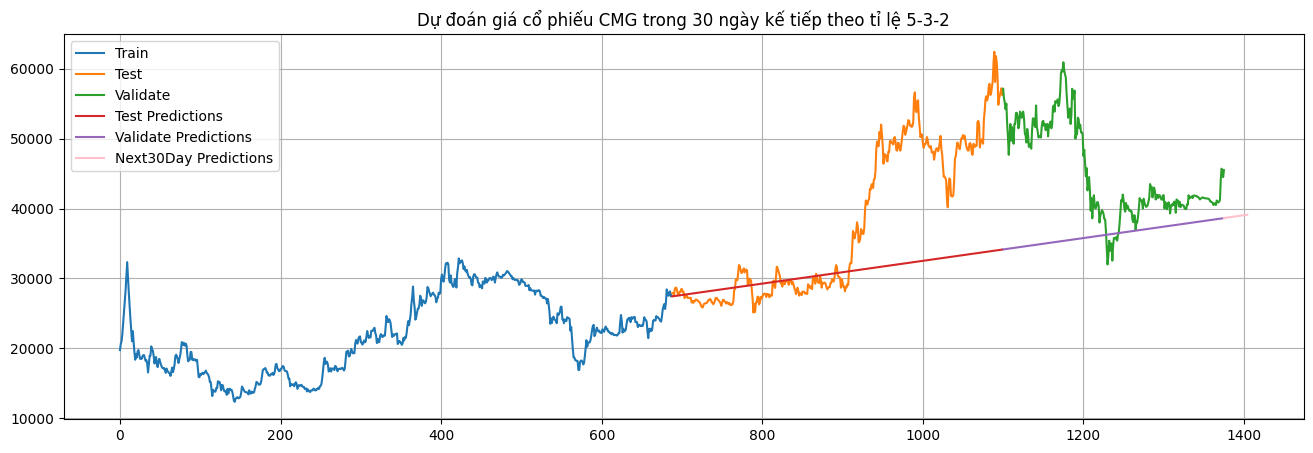

In [37]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu CMG trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()